<a href="https://colab.research.google.com/github/Mikky-sout/MachineLearningOnly/blob/main/ProjectML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction

**Import Librarys**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import metrics
import pandas_datareader.data as web
import pandas
from pandas_datareader import data as pdr
import datetime
import math
from sklearn import model_selection
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler 

**Prepare Dataset**

In [31]:
df = pd.read_csv("/content/drive/MyDrive/heart_2020_cleaned.csv")
df.head()
Y = pd.DataFrame(df['HeartDisease'])
df = df.drop(df[['HeartDisease']],axis=1)
Y

,HeartDisease
0,No
1,No
2,No
3,No
4,No
...,...
319790,Yes
319791,No
319792,No
319793,No


In [32]:
categorical_featureX = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df,columns=categorical_featureX,drop_first=True)
df.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,1,0,0,0,0,0,...,1,0,1,0,0,0,1,1,0,1
1,20.34,0.0,0.0,7.0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,26.58,20.0,30.0,8.0,1,0,0,0,1,0,...,1,0,1,1,0,0,0,1,0,0
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,23.71,28.0,0.0,8.0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [33]:
lb = LabelBinarizer()
labels = lb.fit_transform(Y)
labels = to_categorical(labels)
Y = np.array(labels)

In [34]:
Y = pd.DataFrame(Y)
Y.columns = ['HeartDisease_No','HeartDisease_Yes']
Y

,HeartDisease_No,HeartDisease_Yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
319790,0.0,1.0
319791,1.0,0.0
319792,1.0,0.0
319793,1.0,0.0


In [35]:
standard_scaler = preprocessing.StandardScaler();
X = pd.DataFrame(standard_scaler.fit_transform(df.values),index = df.index, columns=df.columns)
# Y = pd.DataFrame(standard_scaler.fit_transform(Y.values),index = X2.index, columns=X2.columns)


In [36]:
data_Corr = X.corr()
lower = pd.DataFrame(np.tril(data_Corr,-1),columns=data_Corr.columns)

to_drop = [column for column in lower if any(abs(lower[column]) > 0.8)]
X.drop(to_drop,inplace=True,axis = 1)
print(to_drop)

[]


In [37]:
X.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,-1.844750,-0.046751,3.281069,-1.460354,1.193474,-0.27032,-0.198040,-0.401578,-0.951711,-0.236615,...,2.614905,-0.089814,0.538256,-0.348745,-0.640987,-0.191292,1.344886,2.541515,-0.195554,3.118419
1,-1.256338,-0.424070,-0.490039,-0.067601,-0.837890,-0.27032,5.049478,-0.401578,-0.951711,-0.236615,...,-0.382423,-0.089814,0.538256,-0.348745,-0.640987,-0.191292,1.344886,-0.393466,-0.195554,-0.320675
2,-0.274603,2.091388,3.281069,0.628776,1.193474,-0.27032,-0.198040,-0.401578,1.050739,-0.236615,...,2.614905,-0.089814,0.538256,2.867422,-0.640987,-0.191292,-0.743558,2.541515,-0.195554,-0.320675
3,-0.647473,-0.424070,-0.490039,-0.763977,-0.837890,-0.27032,-0.198040,-0.401578,-0.951711,-0.236615,...,-0.382423,-0.089814,-1.857852,-0.348745,1.560094,-0.191292,-0.743558,-0.393466,-0.195554,3.118419
4,-0.726138,3.097572,-0.490039,0.628776,-0.837890,-0.27032,-0.198040,2.490174,-0.951711,-0.236615,...,-0.382423,-0.089814,0.538256,-0.348745,-0.640987,-0.191292,1.344886,-0.393466,-0.195554,-0.320675


In [38]:
Y.head()

,HeartDisease_No,HeartDisease_Yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


**Under Sampling (For imbalance dataset)**

In [39]:
undersample = RandomUnderSampler(sampling_strategy='majority')
ros = RandomOverSampler(random_state=23)
X_us,Y_us = undersample.fit_resample(np.asarray(X), np.asarray(Y))
X_os,Y_os = ros.fit_resample(np.asarray(X), np.asarray(Y))

In [40]:
X_us = pd.DataFrame(X_us)
X_us.columns = X.columns
Y_us = pd.DataFrame(Y_us)

X_os = pd.DataFrame(X_os)
X_os.columns = X.columns
Y_os = pd.DataFrame(Y_os)


In [41]:
lb = LabelBinarizer()
labels = lb.fit_transform(Y_us)
labels = to_categorical(labels)
Y_us = np.array(labels)
Y_us = pd.DataFrame(Y_us)
Y_us.columns = ['HeartDisease_No','HeartDisease_Yes']


lb = LabelBinarizer()
labels = lb.fit_transform(Y_os)
labels = to_categorical(labels)
Y_os = np.array(labels)
Y_os = pd.DataFrame(Y_os)
Y_os.columns = ['HeartDisease_No','HeartDisease_Yes']

In [42]:
X_os

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,-1.844750,-0.046751,3.281069,-1.460354,1.193474,-0.27032,-0.198040,-0.401578,-0.951711,-0.236615,...,2.614905,-0.089814,0.538256,-0.348745,-0.640987,-0.191292,1.344886,2.541515,-0.195554,3.118419
1,-1.256338,-0.424070,-0.490039,-0.067601,-0.837890,-0.27032,5.049478,-0.401578,-0.951711,-0.236615,...,-0.382423,-0.089814,0.538256,-0.348745,-0.640987,-0.191292,1.344886,-0.393466,-0.195554,-0.320675
2,-0.274603,2.091388,3.281069,0.628776,1.193474,-0.27032,-0.198040,-0.401578,1.050739,-0.236615,...,2.614905,-0.089814,0.538256,2.867422,-0.640987,-0.191292,-0.743558,2.541515,-0.195554,-0.320675
3,-0.647473,-0.424070,-0.490039,-0.763977,-0.837890,-0.27032,-0.198040,-0.401578,-0.951711,-0.236615,...,-0.382423,-0.089814,-1.857852,-0.348745,1.560094,-0.191292,-0.743558,-0.393466,-0.195554,3.118419
4,-0.726138,3.097572,-0.490039,0.628776,-0.837890,-0.27032,-0.198040,2.490174,-0.951711,-0.236615,...,-0.382423,-0.089814,0.538256,-0.348745,-0.640987,-0.191292,1.344886,-0.393466,-0.195554,-0.320675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584839,-0.136153,-0.298297,-0.490039,0.628776,-0.837890,-0.27032,-0.198040,-0.401578,-0.951711,-0.236615,...,-0.382423,-0.089814,0.538256,-0.348745,1.560094,-0.191292,-0.743558,-0.393466,-0.195554,-0.320675
584840,-0.622301,-0.424070,0.138479,-0.067601,-0.837890,-0.27032,5.049478,-0.401578,-0.951711,-0.236615,...,-0.382423,-0.089814,0.538256,-0.348745,1.560094,-0.191292,-0.743558,-0.393466,-0.195554,3.118419
584841,1.352184,-0.046751,-0.364335,-0.067601,1.193474,-0.27032,-0.198040,2.490174,1.050739,-0.236615,...,-0.382423,-0.089814,-1.857852,2.867422,-0.640987,-0.191292,-0.743558,2.541515,-0.195554,-0.320675
584842,-0.324948,1.336751,2.024033,-0.763977,-0.837890,-0.27032,-0.198040,2.490174,-0.951711,-0.236615,...,2.614905,-0.089814,0.538256,-0.348745,-0.640987,5.227621,-0.743558,2.541515,-0.195554,3.118419


In [48]:
X_os.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584844 entries, 0 to 584843
Data columns (total 37 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   BMI                               584844 non-null  float64
 1   PhysicalHealth                    584844 non-null  float64
 2   MentalHealth                      584844 non-null  float64
 3   SleepTime                         584844 non-null  float64
 4   Smoking_Yes                       584844 non-null  float64
 5   AlcoholDrinking_Yes               584844 non-null  float64
 6   Stroke_Yes                        584844 non-null  float64
 7   DiffWalking_Yes                   584844 non-null  float64
 8   Sex_Male                          584844 non-null  float64
 9   AgeCategory_25-29                 584844 non-null  float64
 10  AgeCategory_30-34                 584844 non-null  float64
 11  AgeCategory_35-39                 584844 non-null  f

In [92]:
X_os.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
count,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,...,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000
mean,0.076505,0.254084,0.044355,0.010679,0.159939,-0.047085,0.295098,0.298803,0.104081,-0.097244,...,0.270784,-0.021013,-0.146734,0.218886,0.057277,0.261276,-0.151292,0.061818,0.212148,0.137170
std,1.021064,1.254174,1.075435,1.113783,1.015526,0.914511,1.531199,1.238870,0.999738,0.776256,...,1.237417,0.876062,1.082636,1.226130,1.024385,1.499203,0.941348,1.062529,1.413636,1.168312
min,-2.565319,-0.424070,-0.490039,-4.245859,-0.837890,-0.270320,-0.198040,-0.401578,-0.951711,-0.236615,...,-0.382423,-0.089814,-1.857852,-0.348745,-0.640987,-0.191292,-0.743558,-0.393466,-0.195554,-0.320675
25%,-0.619154,-0.424070,-0.490039,-0.763977,-0.837890,-0.270320,-0.198040,-0.401578,-0.951711,-0.236615,...,-0.382423,-0.089814,-1.857852,-0.348745,-0.640987,-0.191292,-0.743558,-0.393466,-0.195554,-0.320675
50%,-0.088954,-0.424070,-0.490039,-0.067601,-0.837890,-0.270320,-0.198040,-0.401578,1.050739,-0.236615,...,-0.382423,-0.089814,0.538256,-0.348745,-0.640987,-0.191292,-0.743558,-0.393466,-0.195554,-0.320675
75%,0.590709,0.204795,-0.112928,0.628776,1.193474,-0.270320,-0.198040,-0.401578,1.050739,-0.236615,...,-0.382423,-0.089814,0.538256,-0.348745,1.560094,-0.191292,1.344886,-0.393466,-0.195554,-0.320675
max,10.466277,3.349118,3.281069,11.770800,1.193474,3.699323,5.049478,2.490174,1.050739,4.226275,...,2.614905,11.134125,0.538256,2.867422,1.560094,5.227621,1.344886,2.541515,5.113667,3.118419


# Train Test Split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test = train_test_split(X_us,Y_us,test_size=0.3,random_state=23)
x_train1,x_test1,y_train1,y_test1 = train_test_split(X,Y,test_size=0.3,random_state=23)
x_train2,x_test2,y_train2,y_test2 = train_test_split(X_os,Y_os,test_size=0.3,random_state=23)

# KNN Training

**Define parameter and Create Model**

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
k = 3

modelKNN = KNeighborsClassifier(n_neighbors=k,p=2)
modelKNN.fit(x_train1,y_train1)

KNeighborsClassifier(n_neighbors=3)

In [24]:
pred = modelKNN.predict(x_test1)
KNNScore = accuracy_score(y_test1,pred)

In [25]:
print('KNN Accuracy :',KNNScore)

KNN Accuracy : 0.8997800685852468


In [26]:
df_pred = pd.DataFrame(pred)
y_pred = df_pred.idxmax(axis=1)

In [27]:
y_true = np.asarray(y_test1)
df_true = pd.DataFrame(y_true)
y_true = df_true.idxmax(axis=1)

In [28]:
print('--------- Confusion matrix-----------')
print(confusion_matrix(y_true, y_pred))
print('--------- Classification Report matrix -----------')
print(classification_report(y_true, y_pred))

--------- Confusion matrix-----------
[[84890  2963]
 [ 6652  1434]]
--------- Classification Report matrix -----------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     87853
           1       0.33      0.18      0.23      8086

    accuracy                           0.90     95939
   macro avg       0.63      0.57      0.59     95939
weighted avg       0.88      0.90      0.89     95939



# KNN Training With Oversampling

In [29]:
k = 3

modelKNN = KNeighborsClassifier(n_neighbors=k,p=2)
modelKNN.fit(x_train2,y_train2)

KNeighborsClassifier(n_neighbors=3)

In [30]:
pred_us = modelKNN.predict(x_test2)
KNNScore_us = accuracy_score(y_test2,pred_us)

In [31]:
print('KNN Accuracy :',KNNScore_us)

KNN Accuracy : 0.9160634696273667


In [32]:
df_pred_us = pd.DataFrame(pred_us)
y_pred_us = df_pred_us.idxmax(axis=1)

In [33]:
y_true_us = np.asarray(y_test2)
df_true_us = pd.DataFrame(y_true_us)
y_true_us = df_true_us.idxmax(axis=1)

In [34]:
print('--------- Confusion matrix-----------')
print(confusion_matrix(y_true_us, y_pred_us))
print('--------- Classification Report matrix -----------')
print(classification_report(y_true_us, y_pred_us))

--------- Confusion matrix-----------
[[73403 14404]
 [  323 87324]]
--------- Classification Report matrix -----------
              precision    recall  f1-score   support

           0       1.00      0.84      0.91     87807
           1       0.86      1.00      0.92     87647

    accuracy                           0.92    175454
   macro avg       0.93      0.92      0.92    175454
weighted avg       0.93      0.92      0.92    175454



# NeuralNetwork Training with Oversampling



In [51]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [52]:
modelNN = Sequential()
modelNN.add(Dense(128, input_dim=37, activation='relu'))
modelNN.add(Dense(128, activation='sigmoid'))
modelNN.add(Dense(128, activation='sigmoid'))
modelNN.add(Dropout(0.5))
modelNN.add(Dense(2, activation='softmax'))
modelNN.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [53]:
modelNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               4864      
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 2)                 258       
                                                                 
Total params: 38,146
Trainable params: 38,146
Non-trainable params: 0
_________________________________________________________________


In [54]:
history = modelNN.fit(x_train2, y_train2, epochs=150, batch_size=32,verbose=1,validation_data=(x_test2,y_test2))

Epoch 1/150
12794/12794 [==============================] - 37s 3ms/step - loss: 0.4938 - accuracy: 0.7651 - val_loss: 0.4837 - val_accuracy: 0.7693
Epoch 2/150
12794/12794 [==============================] - 35s 3ms/step - loss: 0.4854 - accuracy: 0.7697 - val_loss: 0.4802 - val_accuracy: 0.7698
Epoch 3/150
12794/12794 [==============================] - 35s 3ms/step - loss: 0.4805 - accuracy: 0.7712 - val_loss: 0.4752 - val_accuracy: 0.7729
Epoch 4/150
12794/12794 [==============================] - 39s 3ms/step - loss: 0.4728 - accuracy: 0.7738 - val_loss: 0.4685 - val_accuracy: 0.7749
Epoch 5/150
12794/12794 [==============================] - 39s 3ms/step - loss: 0.4630 - accuracy: 0.7781 - val_loss: 0.4567 - val_accuracy: 0.7798
Epoch 6/150
12794/12794 [==============================] - 40s 3ms/step - loss: 0.4514 - accuracy: 0.7838 - val_loss: 0.4482 - val_accuracy: 0.7844
Epoch 7/150
12794/12794 [==============================] - 39s 3ms/step - loss: 0.4396 - accuracy: 0.7904 - val_

In [55]:
predNN = modelNN.predict(x_test2)


In [93]:
predNN

,0,1
0,0.502496,4.975041e-01
1,0.704326,2.956743e-01
2,0.372732,6.272685e-01
3,0.999977,2.260396e-05
4,0.015501,9.844993e-01
...,...,...
175449,1.000000,8.589006e-21
175450,0.000582,9.994181e-01
175451,0.346831,6.531695e-01
175452,0.269543,7.304568e-01


In [56]:
predNN = pd.DataFrame(predNN)
y_predNN = predNN.idxmax(axis=1)


y_trueNN = np.asarray(y_test2)
y_trueNN = pd.DataFrame(y_trueNN)
y_trueNN= y_trueNN.idxmax(axis=1)

In [57]:
NNScore = accuracy_score(y_trueNN,y_predNN)

In [58]:
print(NNScore)

0.8598778027289204


In [59]:
print('--------- Confusion matrix -> NN-----------')
print(confusion_matrix(y_trueNN,y_predNN))
print('--------- Classification Report matrix -> NN-----------')
print(classification_report(y_trueNN,y_predNN))

--------- Confusion matrix -> NN-----------
[[67471 20336]
 [ 4249 83398]]
--------- Classification Report matrix -> NN-----------
              precision    recall  f1-score   support

           0       0.94      0.77      0.85     87807
           1       0.80      0.95      0.87     87647

    accuracy                           0.86    175454
   macro avg       0.87      0.86      0.86    175454
weighted avg       0.87      0.86      0.86    175454



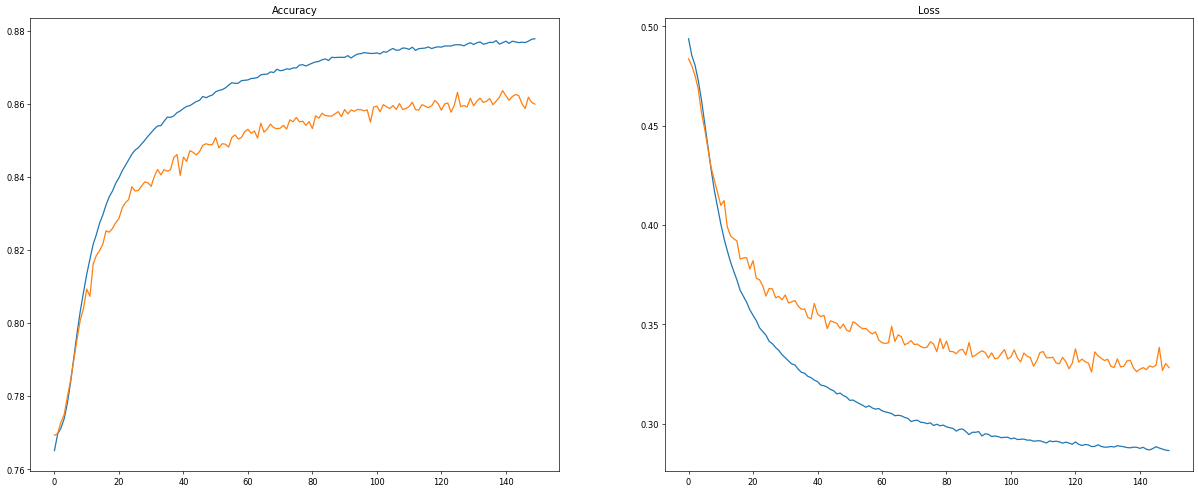

In [83]:
plt.figure(figsize=(25, 10), dpi=60)
plt.subplot(1,2,1)
plt.title('Accuracy')
plt.plot(history.history["accuracy"], label="Train_acc")
plt.plot(history.history["val_accuracy"], label="Validate_acc")
plt.subplot(1,2,2)
plt.title('Loss')
plt.plot(history.history['loss'], label="Train_loss")
plt.plot(history.history['val_loss'], label="Validate_loss")

# NeuralNetwork Training 

In [60]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [61]:
modelNN1 = Sequential()
modelNN1.add(Dense(128, input_dim=37, activation='relu'))
modelNN1.add(Dense(128, activation='sigmoid'))
modelNN1.add(Dense(128, activation='sigmoid'))
modelNN1.add(Dropout(0.5))
modelNN1.add(Dense(2, activation='softmax'))
modelNN1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [85]:
history1 = modelNN1.fit(x_train1, y_train1, epochs=150, batch_size=32,verbose=1,validation_data=(x_test1,y_test1))

Epoch 1/150
6996/6996 [==============================] - 21s 3ms/step - loss: 0.2195 - accuracy: 0.9171 - val_loss: 0.2295 - val_accuracy: 0.9171
Epoch 2/150
6996/6996 [==============================] - 22s 3ms/step - loss: 0.2184 - accuracy: 0.9174 - val_loss: 0.2310 - val_accuracy: 0.9153
Epoch 3/150
6996/6996 [==============================] - 22s 3ms/step - loss: 0.2174 - accuracy: 0.9174 - val_loss: 0.2391 - val_accuracy: 0.9158
Epoch 4/150
6996/6996 [==============================] - 22s 3ms/step - loss: 0.2166 - accuracy: 0.9180 - val_loss: 0.2341 - val_accuracy: 0.9163
Epoch 5/150
6996/6996 [==============================] - 23s 3ms/step - loss: 0.2156 - accuracy: 0.9181 - val_loss: 0.2322 - val_accuracy: 0.9156
Epoch 6/150
6996/6996 [==============================] - 22s 3ms/step - loss: 0.2148 - accuracy: 0.9184 - val_loss: 0.2358 - val_accuracy: 0.9151
Epoch 7/150
6996/6996 [==============================] - 21s 3ms/step - loss: 0.2134 - accuracy: 0.9189 - val_loss: 0.2401 -

In [86]:
predNN1 = modelNN1.predict(x_test1)

In [87]:
predNN1 = pd.DataFrame(predNN1)
y_predNN1 = predNN1.idxmax(axis=1)


y_trueNN1 = np.asarray(y_test1)
y_trueNN1 = pd.DataFrame(y_trueNN1)
y_trueNN1 = y_trueNN1.idxmax(axis=1)

In [88]:
NNScore1 = accuracy_score(y_trueNN1,y_predNN1)

In [89]:
print(NNScore1)

0.9129863767602331


In [90]:
print('--------- Confusion matrix -> NN-----------')
print(confusion_matrix(y_trueNN1,y_predNN1))
print('--------- Classification Report matrix -> NN-----------')
print(classification_report(y_trueNN1,y_predNN1))

--------- Confusion matrix -> NN-----------
[[86803  1050]
 [ 7298   788]]
--------- Classification Report matrix -> NN-----------
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     87853
           1       0.43      0.10      0.16      8086

    accuracy                           0.91     95939
   macro avg       0.68      0.54      0.56     95939
weighted avg       0.88      0.91      0.89     95939



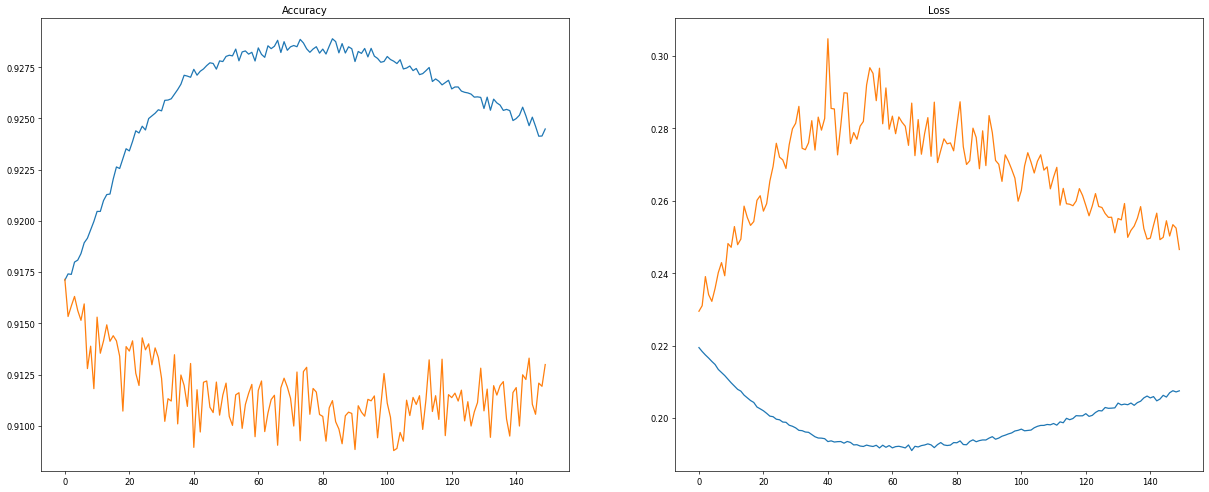

In [91]:
plt.figure(figsize=(25, 10), dpi=60)
plt.subplot(1,2,1)
plt.title('Accuracy')
plt.plot(history1.history["accuracy"], label="Train_acc")
plt.plot(history1.history["val_accuracy"], label="Validate_acc")
plt.subplot(1,2,2)
plt.title('Loss')
plt.plot(history1.history['loss'], label="Train_loss")
plt.plot(history1.history['val_loss'], label="Validate_loss")

# Gridsearch for KNN

In [17]:
from sklearn.model_selection import  GridSearchCV
import os

**Define KNN parameter**

In [18]:
K_list = [3,5,15,25,35,45,55]
KNN_params = dict(n_neighbors=K_list)
n_cpu = os.cpu_count()

**split dataset for gridsearch**

In [19]:
x_train_gs,x_test_gs,y_train_gs,y_test_gs = train_test_split(x_train2,y_train2,test_size=0.5,random_state=23)

In [20]:
len(x_train_gs)

204695

In [ ]:
grid = GridSearchCV( estimator=KNeighborsClassifier(p=2),
                              n_jobs=n_cpu-1,
                              verbose=10,
                              scoring='accuracy',
                              cv=2,
                              param_grid=KNN_params)

In [ ]:
grid_result = grid.fit(x_train_gs,y_train_gs)

Fitting 2 folds for each of 7 candidates, totalling 14 fits
[CV 1/2; 1/7] START n_neighbors=3...............................................
[CV 1/2; 1/7] END ................n_neighbors=3;, score=0.800 total time= 2.5min
[CV 2/2; 1/7] START n_neighbors=3...............................................
[CV 2/2; 1/7] END ................n_neighbors=3;, score=0.798 total time= 2.5min
[CV 1/2; 2/7] START n_neighbors=5...............................................
[CV 1/2; 2/7] END ................n_neighbors=5;, score=0.780 total time= 3.1min
[CV 2/2; 2/7] START n_neighbors=5...............................................
[CV 2/2; 2/7] END ................n_neighbors=5;, score=0.778 total time= 3.0min
[CV 1/2; 3/7] START n_neighbors=15..............................................
[CV 1/2; 3/7] END ...............n_neighbors=15;, score=0.768 total time= 3.1min
[CV 2/2; 3/7] START n_neighbors=15..............................................
[CV 2/2; 3/7] END ...............n_neighbors=15;,

In [ ]:
print(grid_result.best_params_)
print(grid_result.best_score_)

{'n_neighbors': 3}
0.7989691913878165


In [ ]:
grid_result2 = grid.fit(x_train,y_train)

Fitting 2 folds for each of 7 candidates, totalling 14 fits
[CV 1/2; 1/7] START n_neighbors=3...............................................
[CV 1/2; 1/7] END ................n_neighbors=3;, score=0.720 total time=   9.6s
[CV 2/2; 1/7] START n_neighbors=3...............................................
[CV 2/2; 1/7] END ................n_neighbors=3;, score=0.719 total time=   6.5s
[CV 1/2; 2/7] START n_neighbors=5...............................................
[CV 1/2; 2/7] END ................n_neighbors=5;, score=0.736 total time=   8.8s
[CV 2/2; 2/7] START n_neighbors=5...............................................
[CV 2/2; 2/7] END ................n_neighbors=5;, score=0.732 total time=   7.1s
[CV 1/2; 3/7] START n_neighbors=15..............................................
[CV 1/2; 3/7] END ...............n_neighbors=15;, score=0.752 total time=   8.9s
[CV 2/2; 3/7] START n_neighbors=15..............................................
[CV 2/2; 3/7] END ...............n_neighbors=15;,

In [ ]:
print(grid_result.best_params_)
print(grid_result.best_score_)

{'n_neighbors': 35}
0.7555973070299045


# Gridsearch for KNN

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
def create_model(optimizer='adam'):
  modelNN = Sequential()
  modelNN.add(Dense(128, input_dim=37, activation='relu'))
  modelNN.add(Dense(128, activation='sigmoid'))
  modelNN.add(Dense(128, activation='sigmoid'))
  modelNN.add(Dropout(0.5))
  modelNN.add(Dense(2, activation='softmax'))
  modelNN.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  return modelNN

In [ ]:
model_gs = KerasClassifier(build_fn=create_model,verbose=1)
EPList = [50,100,150]
BSList = [32,64,128]
OPlist = ['Adam']
param_grid = dict(optimizer=OPlist,epochs=EPList,batch_size=BSList)
grid = GridSearchCV(estimator=model_gs, param_grid=param_grid,  cv=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
grid_resultNN = grid.fit(x_train_gs, y_train_gs)

Epoch 1/50
3199/3199 [==============================] - 8s 2ms/step - loss: 0.5064 - accuracy: 0.7574
Epoch 2/50
3199/3199 [==============================] - 7s 2ms/step - loss: 0.4916 - accuracy: 0.7671
Epoch 3/50
3199/3199 [==============================] - 7s 2ms/step - loss: 0.4887 - accuracy: 0.7680
Epoch 4/50
3199/3199 [==============================] - 7s 2ms/step - loss: 0.4867 - accuracy: 0.7700
Epoch 5/50
3199/3199 [==============================] - 7s 2ms/step - loss: 0.4838 - accuracy: 0.7706
Epoch 6/50
3199/3199 [==============================] - 7s 2ms/step - loss: 0.4814 - accuracy: 0.7707
Epoch 7/50
3199/3199 [==============================] - 7s 2ms/step - loss: 0.4792 - accuracy: 0.7730
Epoch 8/50
3199/3199 [==============================] - 7s 2ms/step - loss: 0.4761 - accuracy: 0.7734
Epoch 9/50
3199/3199 [==============================] - 7s 2ms/step - loss: 0.4735 - accuracy: 0.7745
Epoch 10/50
3199/3199 [==============================] - 7s 2ms/step - loss: 0.469

In [ ]:
print(grid_resultNN.best_score_)
print(grid_resultNN.best_params_)

0.8163071870803833
{'batch_size': 32, 'epochs': 150, 'optimizer': 'Adam'}
